# **1. Perkenalan Dataset**


Pada proyek Machine Learning ini, saya menggunakan dataset "Vehicle Insurance" yang memiliki kriteria sebagai berikut:

**1. Sumber Dataset**

Dataset yang digunakan dalam proyek ini adalah "Vehicle Insurance" yang dapat diakses melalui tautan berikut:

https://www.kaggle.com/datasets/ranja7/vehicle-insurance-customer-data/data

**2. Ketentuan Dataset**

- Dataset yang digunakan tidak memuat label atau kelas dengan 24 variabel yang cocok untuk digunakan analisis klustering
- Jumlah baris atau banyaknya data yang digunakan pada dataset ini adalah sebanyak 9.314 data pelanggan
- Dataset ini mengandung kombinasi data numerikal dan kategorikal, yaitu:
    - Numerikal : Customer Lifetime Value, Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, Total Claim Amount
    - Kategorikal : Gender, Education, State, Response, Coverage, Effective To Date, Employment Status, Location Code, Marital Status, Policy Type, Policy, Renew Offer Type, Sales Channel, Vehicle Class, Vehicle Size

# **2. Import Library**

In [1]:
# mengimport library untuk analisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# mengimport dan menyimpan dataset
df = pd.read_csv('AutoInsurance.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


 Dataset ini berisi informasi tentang pelanggan asuransi, mencakup data dan informasi pelanggan sebagai berikut:
 
#### **Identitas Pelanggan**  
- **`Customer`** : ID unik dari setiap pelanggan.  
- **`State`** : Negara bagian tempat pelanggan tinggal.  

#### **Informasi Keuangan & Nilai Pelanggan**  
- **`Customer Lifetime Value`** : Nilai total pelanggan bagi perusahaan dalam jangka panjang dengan nilai yang lebih tinggi menunjukkan pelanggan yang lebih berharga.  
- **`Income`** : Pendapatan setiap pelanggan.  

#### **Respon & Preferensi Pelanggan**  
- **`Response`** : Indikator apakah pelanggan menanggapi kampanye pemasaran atau tidak (menerima atau menolak penawaran).  
- **`Sales Channel`** : Saluran yang digunakan pelanggan untuk membeli polis asuransi (agen, telepon, online).  

#### **nformasi Polis & Jenis Asuransi**  
- **`Coverage`** : Tingkat perlindungan yang dipilih pelanggan.  
- **`Policy Type`** : Jenis polis yang dimiliki pelanggan.  
- **`Policy`** : Subkategori dari `Policy Type`, memberikan informasi lebih rinci tentang jenis polis.  
- **`Renew Offer Type`** : Tipe penawaran perpanjangan polis yang diberikan kepada pelanggan.  

#### **Informasi Demografi Pelanggan**  
- **`Education`** : Tingkat pendidikan pelanggan.  
- **`EmploymentStatus`** : Status pekerjaan pelanggan.  
- **`Gender`** : Jenis kelamin pelanggan.  
- **`Marital Status`** : Status pernikahan pelanggan.  
- **`Location Code`** : Kode lokasi pelanggan berdasarkan kepadatan penduduk.  
- **`Vehicle Class`** : Kategori kendaraan pelanggan.  
- **`Vehicle Size`** : Ukuran kendaraan pelanggan.  

#### **Informasi Pembayaran & Premi Asuransi**  
- **`Monthly Premium Auto`** : Besarnya pembayaran premi asuransi mobil per bulan.  

#### **Riwayat Klaim & Polis**  
- **`Months Since Last Claim`** : Lama waktu sejak pelanggan terakhir kali mengajukan klaim asuransi.  
- **`Months Since Policy Inception`** : Lama waktu sejak pelanggan pertama kali mendaftar polis asuransi.  
- **`Number of Open Complaints`** : Jumlah keluhan pelanggan yang masih dalam proses penyelesaian.  
- **`Number of Policies`** : Jumlah polis yang dimiliki pelanggan.  
- **`Total Claim Amount`** : Total jumlah uang yang telah diklaim pelanggan dari asuransi.  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan dilakukan tahapan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami Struktur Data

In [3]:
# mengecek informasi dataset awal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
# mengecek ukuran dataframe
df.shape

(9134, 24)

### Tipe dan Jenis data pada dataset "Vehicle Insurance" adalah sebagai berikut :

**Kategorikal** (15 kolom): Sebagian besar fitur bersifat kategorikal atau identifikasi unik, seperti Customer, State, Response, Coverage, Education, Effective To Date, Employment Status, Gender, Location Code, Marital Status, Policy Type, Policy, Renew Offer Type, Sales Channel, Vehicle Class, dan Vehicle Size.

**Numerikal** (9 kolom): Customer Lifetime Value, Total Claim Amount, Income, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, Monthly Premium Auto dan Monthly Premium Auto.

Mayoritas data bertipe object yang menunjukkan perlu dilakukan encoding sebelum digunakan pada permodelan. Selain itu, data numerikal mungkin perlu distandarisasi untuk memastikan hasil clustering yang optimal.

## Menangani Data Hilang dan Duplikat

In [5]:
# menghapus kolom atau fitur yang tidak digunakan dalam analisis
df.drop(['Customer', 'Effective To Date'], axis=1, inplace=True)

In [6]:
# mengecek missing value
df.isnull().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
# mengecek duplikat data
df.duplicated().sum()

163

In [8]:
# menghapus duplikat data
df = df.drop_duplicates()
df.duplicated().sum()

0

#### **Penjelasan**

Tidak ditemukan adanya missing value pada dataset akan tetapi ditemukan adanya duplikat pada dataset sehingga perlu adanya penanganan yang dilakukan yaitu menghapus duplikat pada dataset.

## Analisis Distribusi dan Korelasi

In [9]:
# mengecek distribusi statistika deskriptif dataset
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,8004.192319,37644.828113,93.192621,15.099209,48.054175,0.385241,2.970349,433.886437
std,6867.941039,30431.741597,34.358960,10.077668,27.916442,0.909666,2.391832,291.074428
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3999.497700,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.472690
50%,5792.439588,33947.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.442328
75%,8954.637109,62365.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.988754
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
df.describe(include='object')

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971
unique,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3081,7826,5469,2704,5604,4579,5656,5210,6641,3334,3685,3394,4542,6311


In [11]:
# mengelompokkan data numerik dan menghitung korelasi
df_numeric = df.select_dtypes(include=["number"])
corr_matrix = df_numeric.corr()

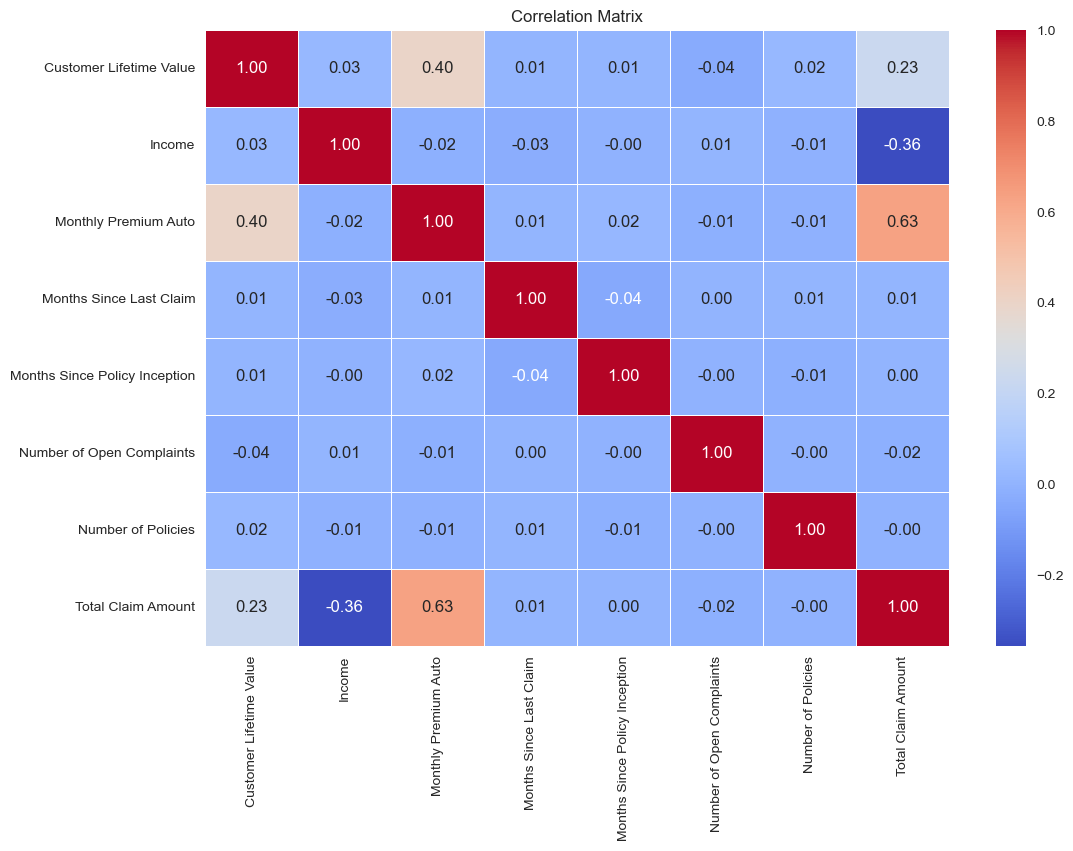

In [12]:
# membuat visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### **Penjelasan**

- `Monthly Premium Auto` berkorelasi kuat dengan `Total Claim Amount` yang menunjukkan bahwa semakin besar premi bulanan, semakin besar jumlah klaim total.

- `Income` berkorelasi negatif `Total Claim Amount` yang menunjukkan bahwa pelanggan berpenghasilan tinggi cenderung mengajukan klaim lebih kecil.

- `Customer Lifetime Value` berkorelasi dengan `Monthly Premium Auto`, tetapi tidak langsung dengan `Total Claim Amount` yang berarti pelanggan dengan CLV tinggi membayar lebih banyak premi tetapi tidak selalu mengajukan lebih banyak klaim.

- `Number of Open Complaints` dan `Months Since Last Claim` tidak berpengaruh signifikan terhadap `Total Claim Amount` yang bisa menjadi wawasan penting untuk kebijakan layanan pelanggan.

- `Number of Policies` yang dimiliki pelanggan tidak memengaruhi `Total Claim Amount` menunjukkan bahwa memiliki lebih banyak polis tidak berarti pelanggan akan mengajukan lebih banyak klaim.

Berdasarkan distribusi data numerik, ditemukan skala yang berbeda-beda untuk setiap variabel sehingga perlu adanya scalling sebelum permodelan.

## Visualisasi Data

In [13]:
# mengelompokkan dan menyimpan data kategorik
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

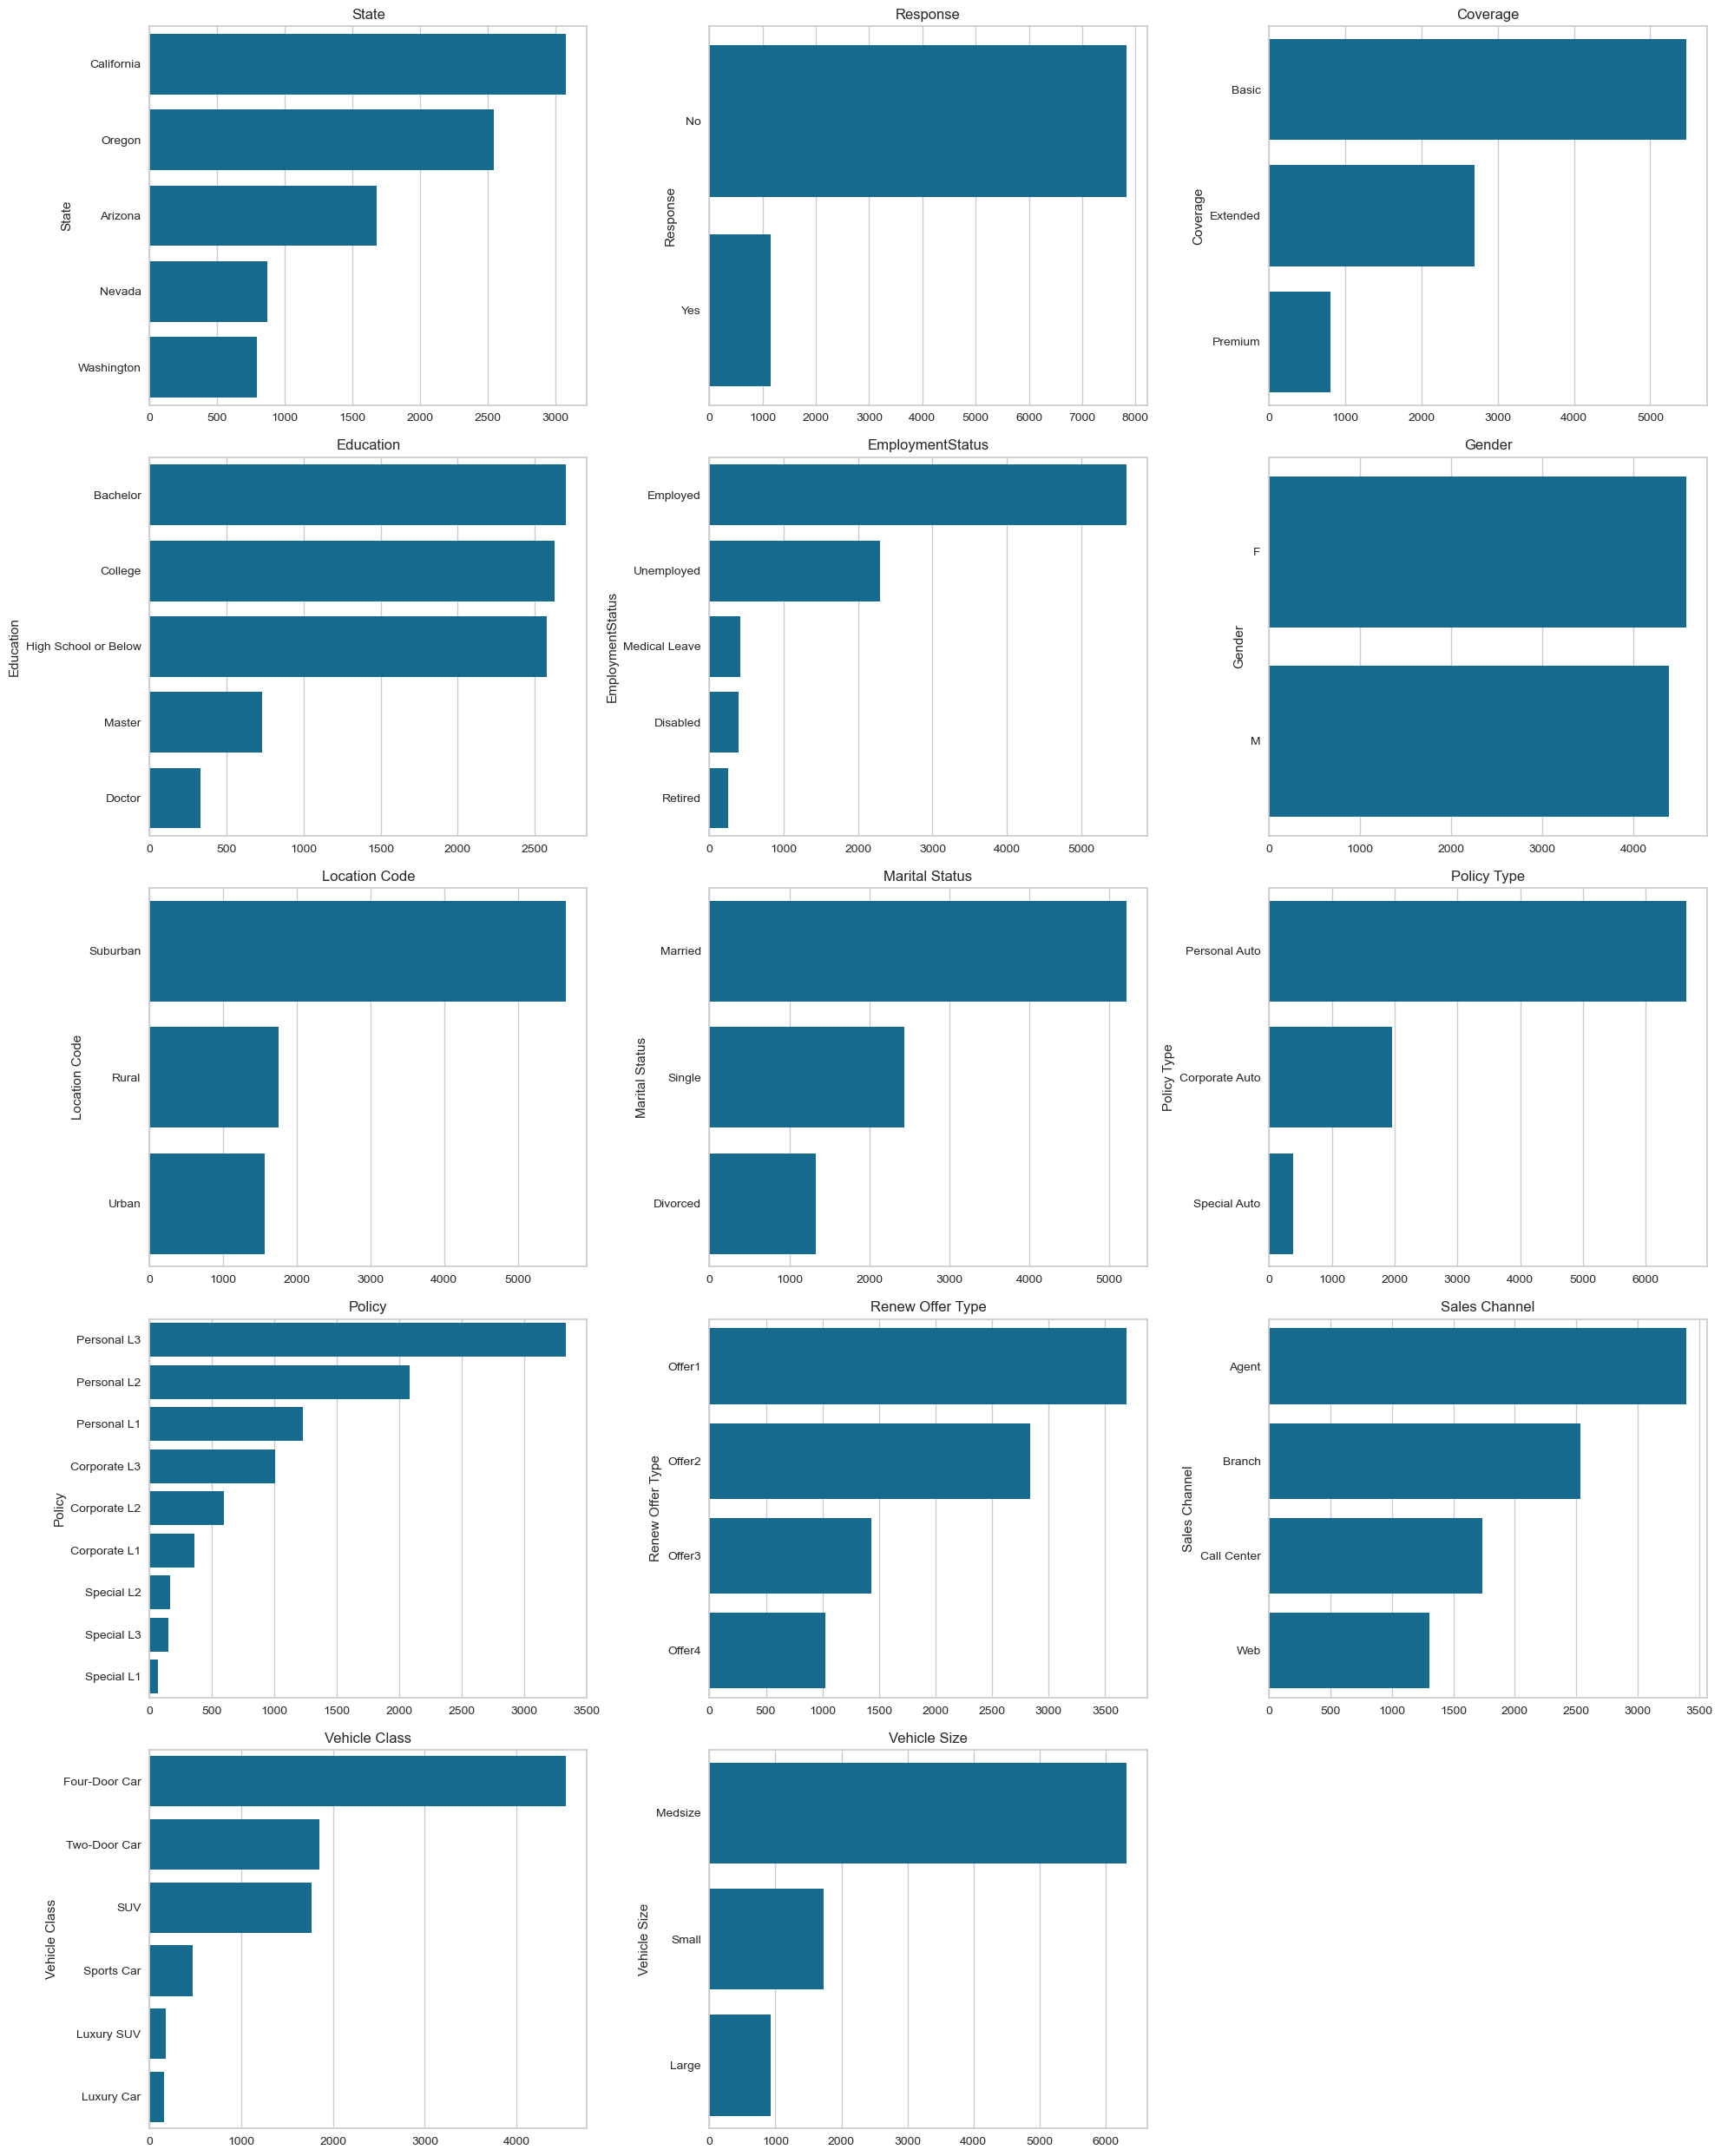

In [14]:
# membuat visualisasi data kategorik
n_cols = 3  
n_rows = -(-len(categorical_columns) // n_cols)

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [15]:
# mengelompokkan dan menyimpan data numerik
numeric_columns = df.select_dtypes(include='number')

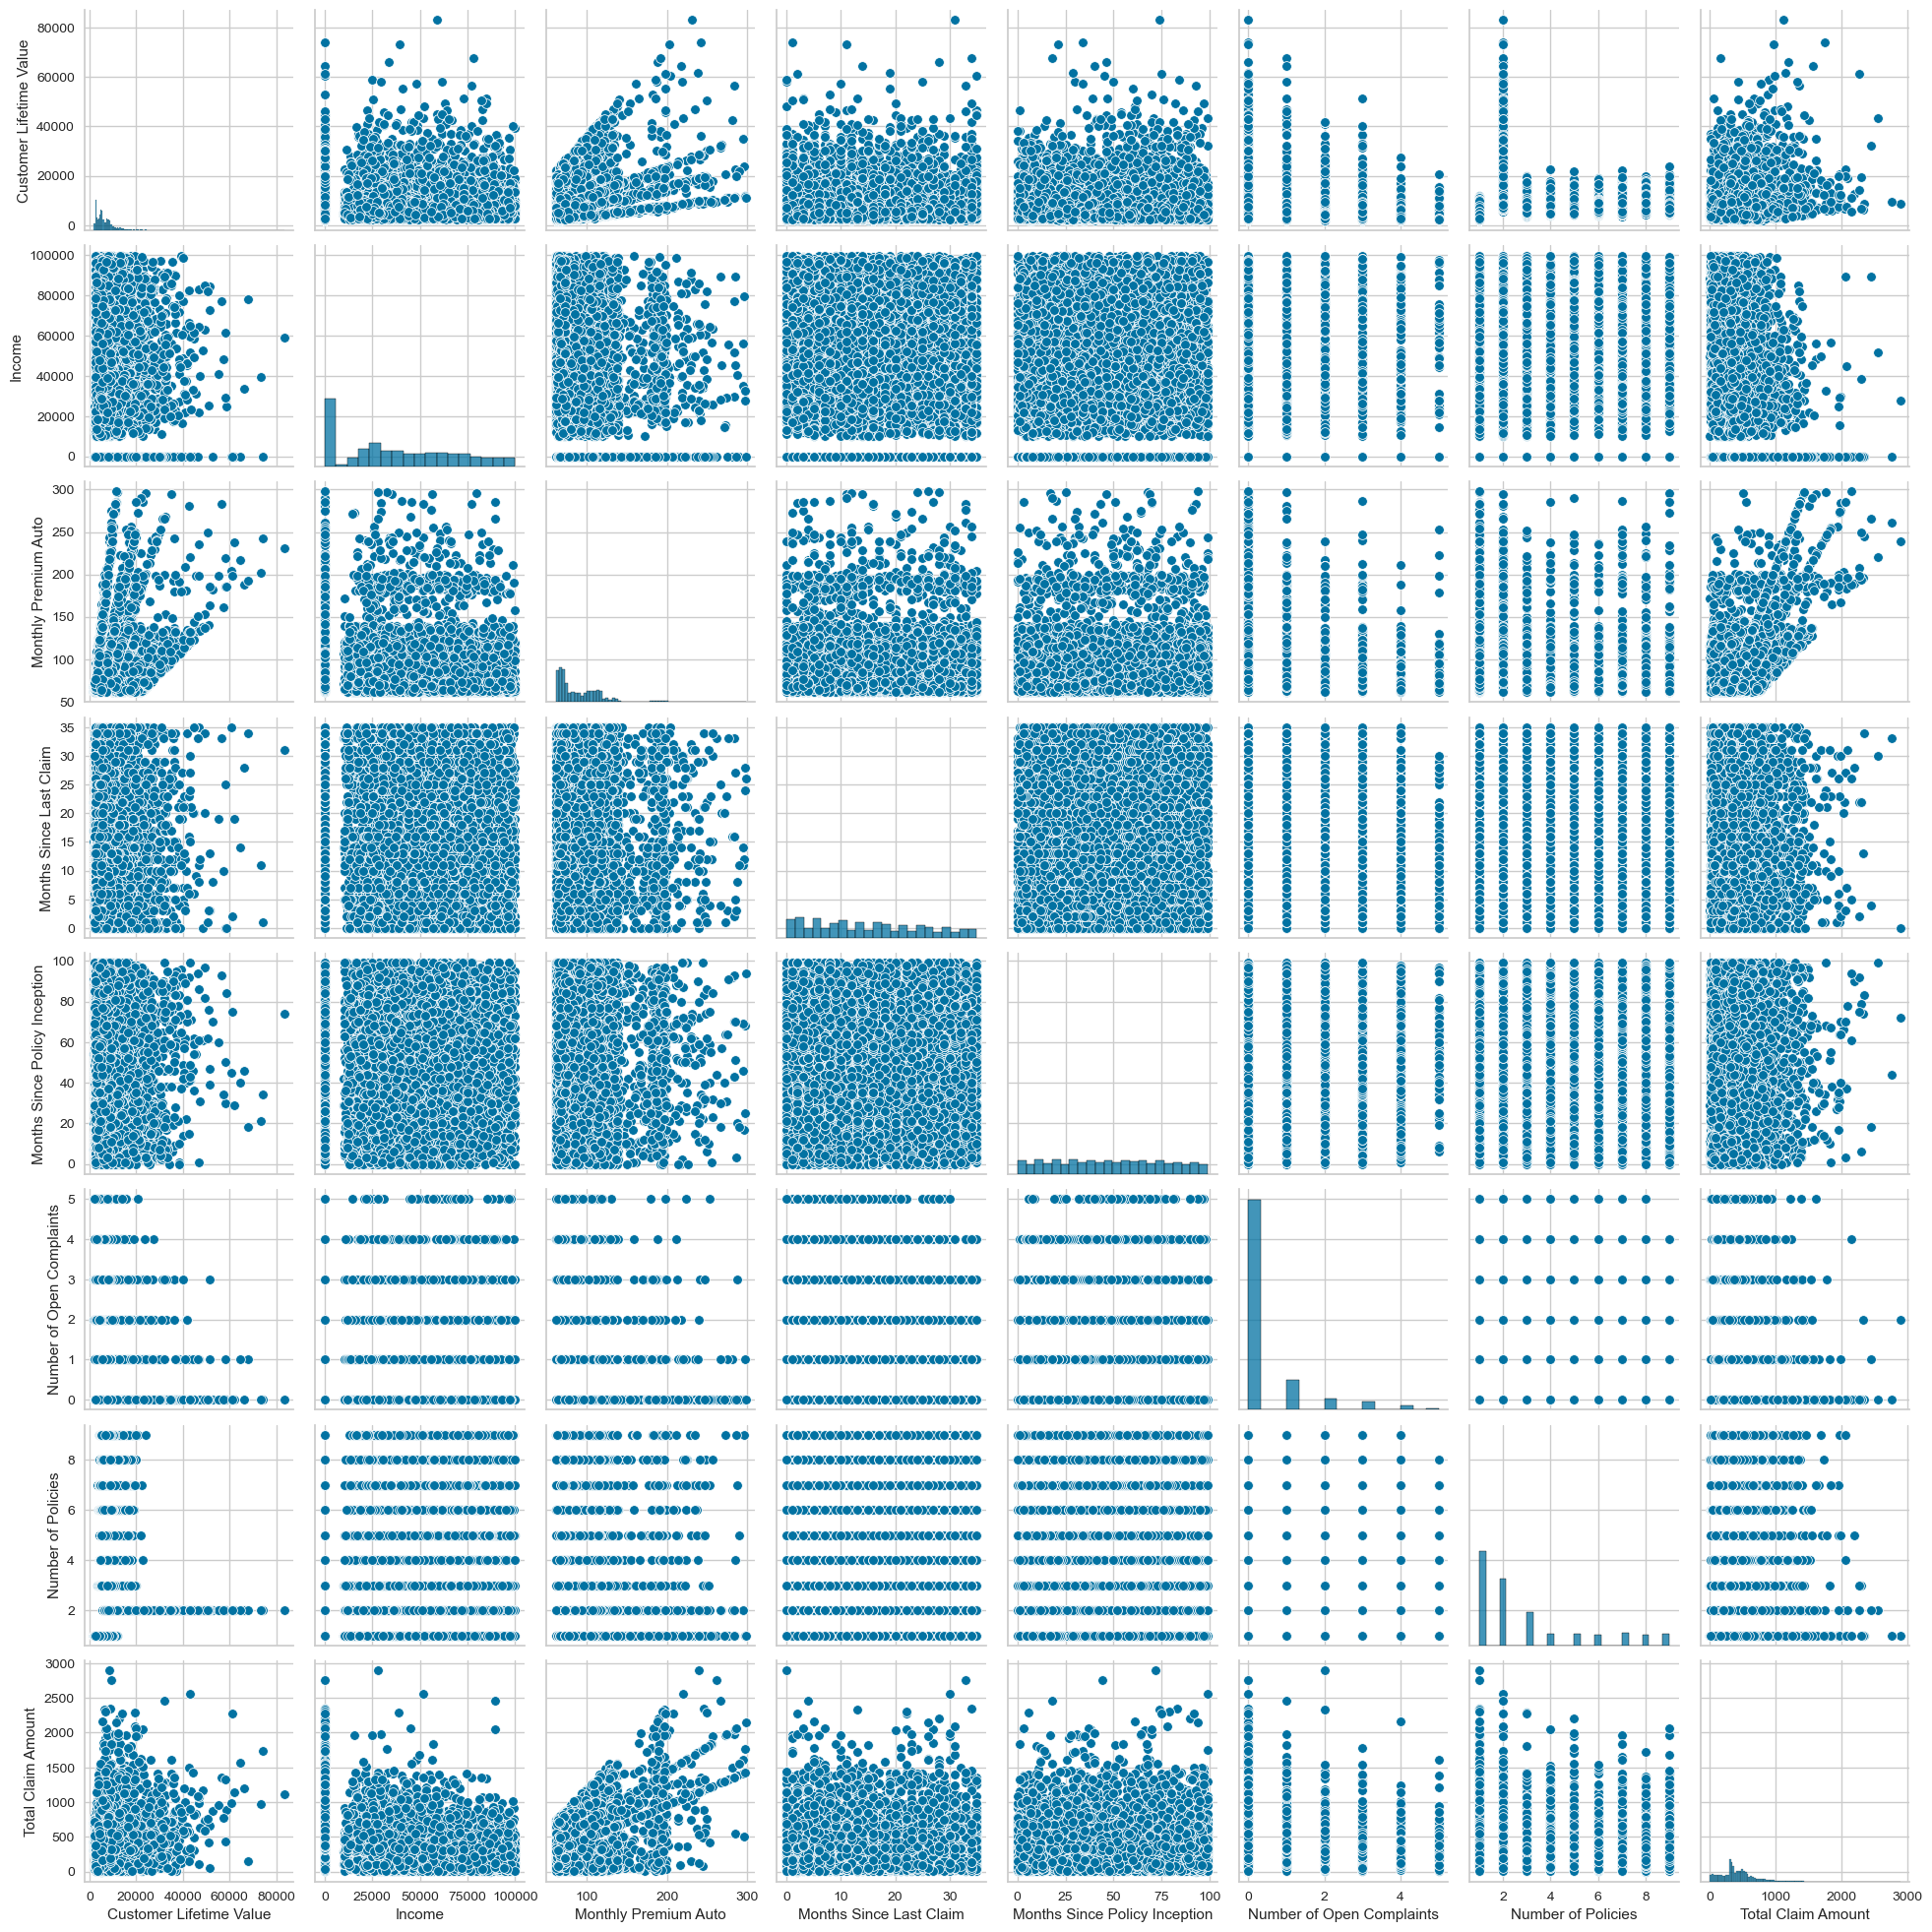

In [16]:
# membuat visualisasi pairplot data numerik
sns.pairplot(numeric_columns)
plt.show()

#### **Penjelasan**

##### **Data Kategorik**  

- **`State`** : Pelanngan mayoritas berasal dari **California**, diikuti oleh **Oregon** dan **Arizona**, sedangkan **Nevada** dan **Washington** memiliki jumlah pelanggan yang lebih sedikit.
  
- **`Response`** : Sebagian besar pelanggan tidak memberikan respons terhadap penawaran perusahaan yang mengindikasikan rendahnya tingkat keterlibatan pelanggan.

- **`Coverage`** : Mayoritas pelanggan memilih paket asuransi **Basic**, sedangkan paket **Extended** dan **Premium** memiliki jumlah pelanggan yang jauh lebih sedikit.

- **`Education`** : Sebagian besar pelanggan memiliki pendidikan **College**, **Bachelor**, atau **High School or Below**, sedangkan pelanggan dengan pendidikan **Master** dan **Doctor** lebih sedikit.

- **`Employment Status`** : Pelanggan berstatus **Employed** menjadi yang terbanyak, sedangkan kategori **Unemployed**, **Medical Leave**, **Disabled**, dan **Retired** memiliki jumlah pelanggan yang jauh lebih sedikit.

- **`Gender`** : Terdapat sedikit lebih banyak pelanggan perempuan (**F**) dibandingkan laki-laki (**M**) dengan perbedaan yang tidak terlalu signifikan.

- **`Location Code`** : Mayoritas pelanggan bertempat tinggal di **Suburban** dengan pelanggan yang tinggal di **Urban** dan **Rural** memiliki jumlah yang lebih sedikit.

- **`Marital Status`** : Sebagian besar pelanggan berstatus **Married**, sedangkan **Single** dan **Divorced** memiliki jumlah yang lebih sedikit.

- **`Policy Type`** : **Personal Auto** adalah jenis polis yang paling umum digunakan pelanggan dengan polis **Corporate Auto** dan **Special Auto** memiliki jumlah pelanggan yang jauh lebih sedikit.

- **`Policy`** :Polis dengan kategori **Special L1**, **Special L2**, dan **Special L3** memiliki jumlah pelanggan yang sangat sedikit apabila dibandingkan dengan **Personal L3**.

- **`Renew Offer Type`** : **Offer2** adalah offer yang paling banyak dipilih oleh pelanggan, diikuti oleh **Offer1**, sedangkan **Offer3** dan **Offer4** lebih jarang digunakan.

- **`Sales Channel`** : **Agent** adalah jalur yang sering digunakan pelanggan, sementara **Branch**, **Call Center**, dan **Web** lebih sedikit penggunaannya.

- **`Vehicle Class`** : Mayoritas pelanggan memiliki kendaraan bertipe **Four-Door Car**, diikuti oleh **Two-Door Car** dan **SUV**, sedangkan kendaraan **Luxury SUV** dan **Luxury Car** lebih jarang dimiliki pelanggan.

- **`Vehicle Size`** : Sebagian besar pelanggan memiliki kendaraan berukuran **Medium**, sementara kendaraan **Small** dan **Large** lebih jarang dimiliki.

##### **Data Numerik**
**`Distribusi Univariat (Histogram)`**  
- `Customer Lifetime Value` memiliki distribusi yang right-skewed dan terdapat beberapa outlier.

- `Income` berdistribusi right-skewed, dengan banyak pelanggan berpenghasilan rendah (terlihat ada banyak titik di nol).

- `Monthly Premium Auto` memiliki distribusi yang lebih merata tetapi terdapat beberapa titik dengan premi yang jauh lebih tinggi.

- `Months Since Policy Inception` terlihat tersebar merata, menunjukkan bahwa pelanggan bergabung dalam berbagai waktu yang berbeda.

- `Total Claim Amount` berdistribusi right-skewed, dengan beberapa klaim yang sangat tinggi sebagai outlier.

**`Hubungan Antar Variabel (Scatter Plot)`**  
- `Customer Lifetime Value` dan `Income`: Menunjukkan Pola hubungan positif—pelanggan dengan Income lebih tinggi cenderung memiliki Customer Lifetime Value lebih tinggi.

- `Customer Lifetime Value` dan `Monthly Premium Auto`: Semakin tinggi premi bulanan, semakin besar lifetime value pelanggan, meskipun dengan banyak variasi.

- `Total Claim Amount` dan `Monthly Premium Auto`: Terdapat kecenderungan pelanggan dengan premi lebih tinggi mengajukan klaim lebih besar.

- `Months Since Policy Inception` dan Variabel Lainnya: Terlihat tidak memiliki pola korelasi yang jelas dan tersebar secara acak.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang akan dilakukan berdasarkan dataset:
1. Deteksi dan Penanganan Outlier
2. Encoding Data Kategorikal
3. Normalisasi atau Standarisasi Fitur

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Deteksi dan Penanganan Outlier

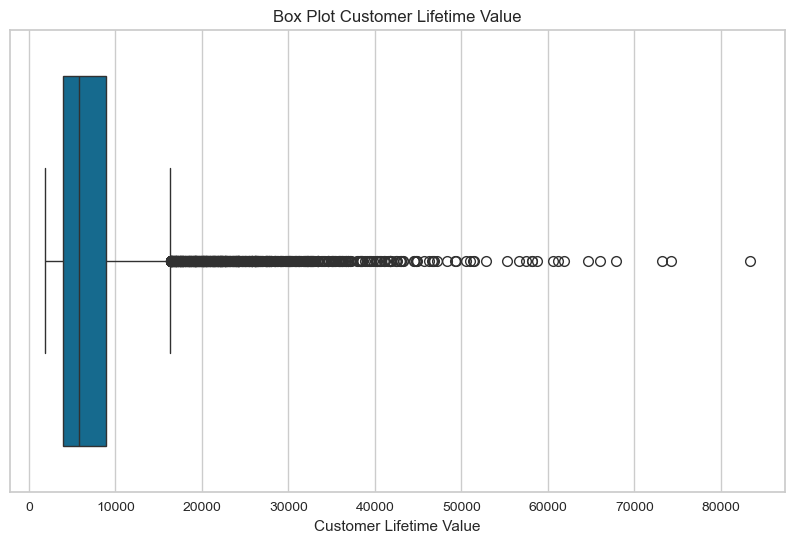

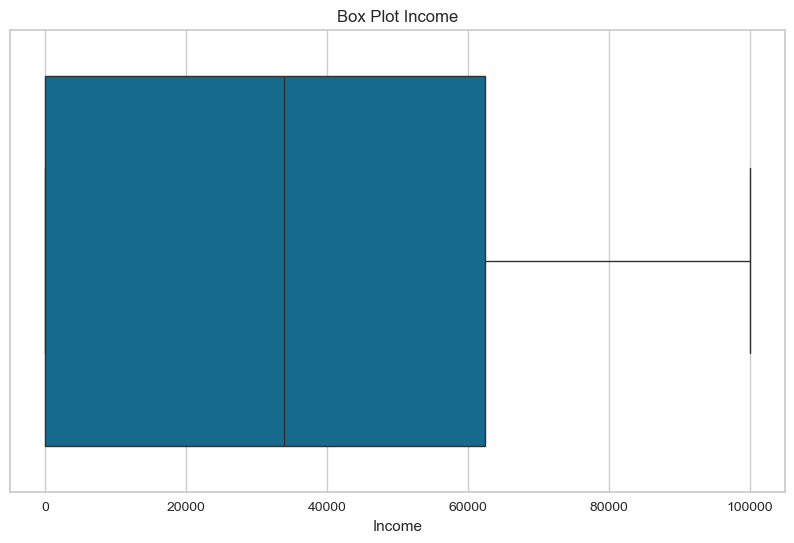

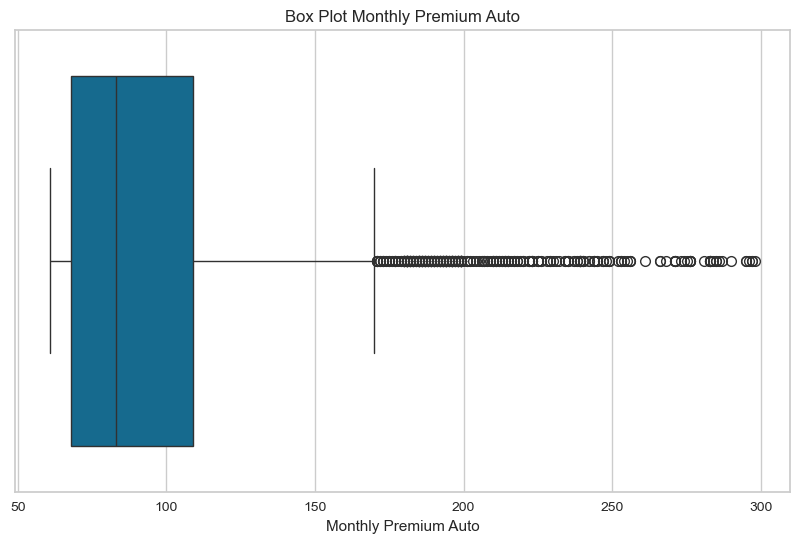

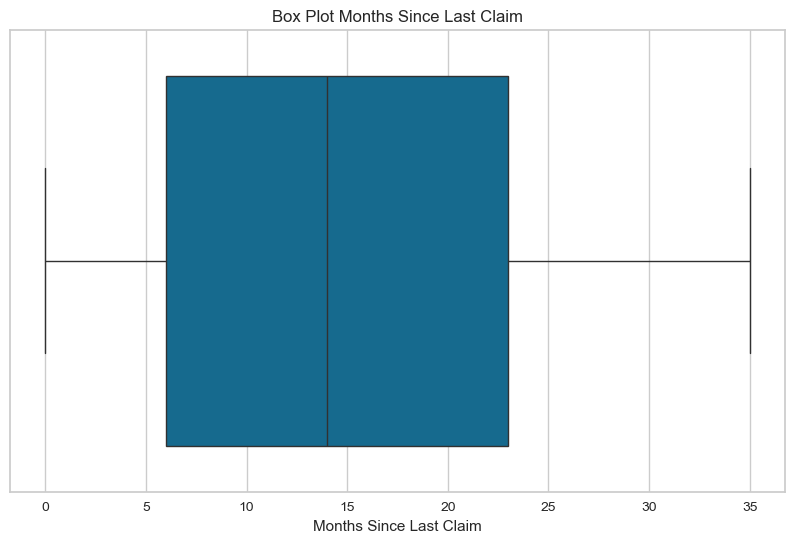

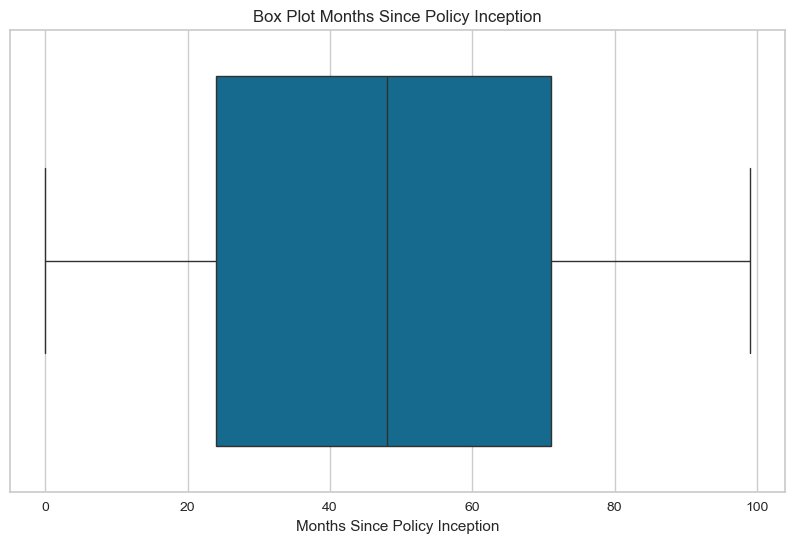

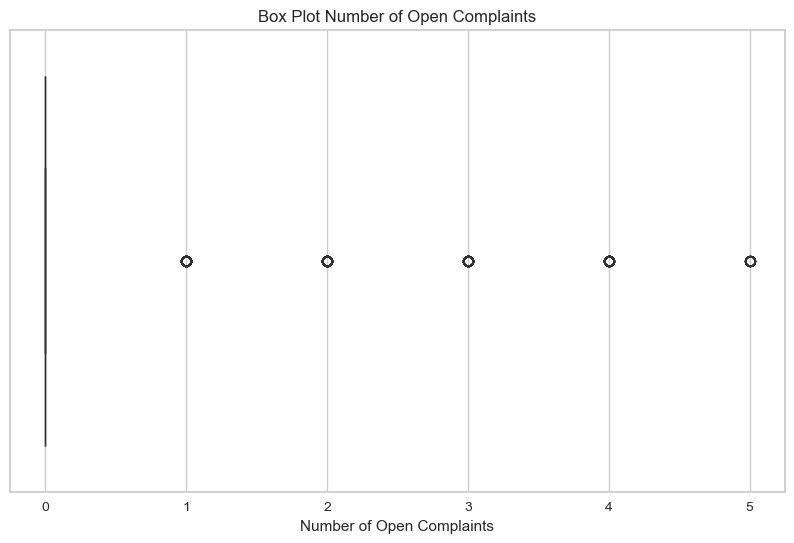

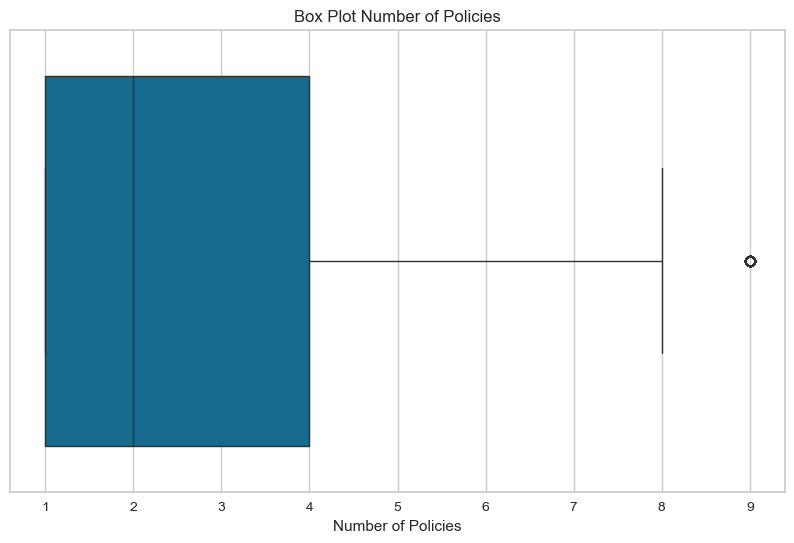

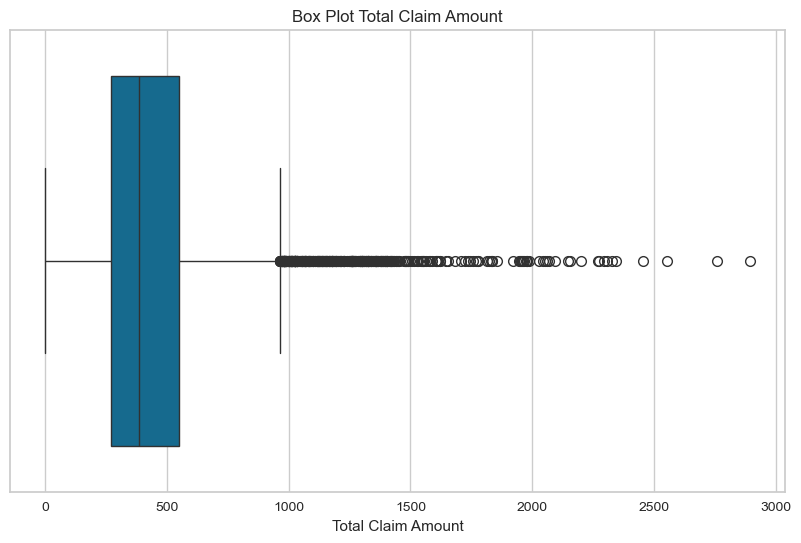

In [17]:
# melihat visualisasi box plot data numerik untuk pengecekan outlier
num_data = df.select_dtypes(exclude=['object'])
num_cols = num_data.columns

for feature in num_data:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=num_data[feature])
    plt.title(f'Box Plot {feature}')
    plt.show

In [18]:
# menangani outlier dengan IQR
Q1 = df.select_dtypes(exclude=['object']).quantile(0.25)
Q3 = df.select_dtypes(exclude=['object']).quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
# mengisi data outlier dengan batas outlier
for feature in df.select_dtypes(exclude=['object']).columns:
    df.loc[df[feature] < lower_bound[feature], feature] = lower_bound[feature]
    df.loc[df[feature] > upper_bound[feature], feature] = upper_bound[feature]

C:\Users\M Ilham Ramadhan\AppData\Local\Temp\ipykernel_30824\460845300.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-93548.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound[feature], feature] = lower_bound[feature]
C:\Users\M Ilham Ramadhan\AppData\Local\Temp\ipykernel_30824\460845300.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound[feature], feature] = lower_bound[feature]
C:\Users\M Ilham Ramadhan\AppData\Local\Temp\ipykernel_30824\460845300.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-19.5' has dtype incompatible with int

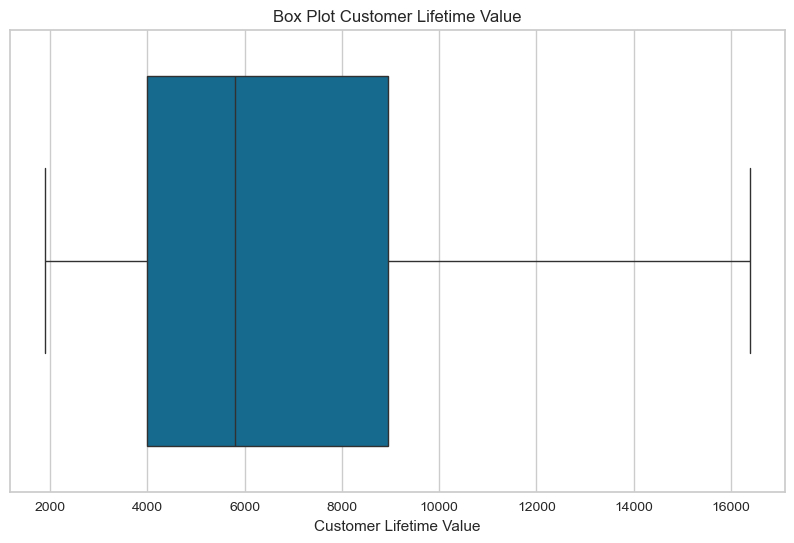

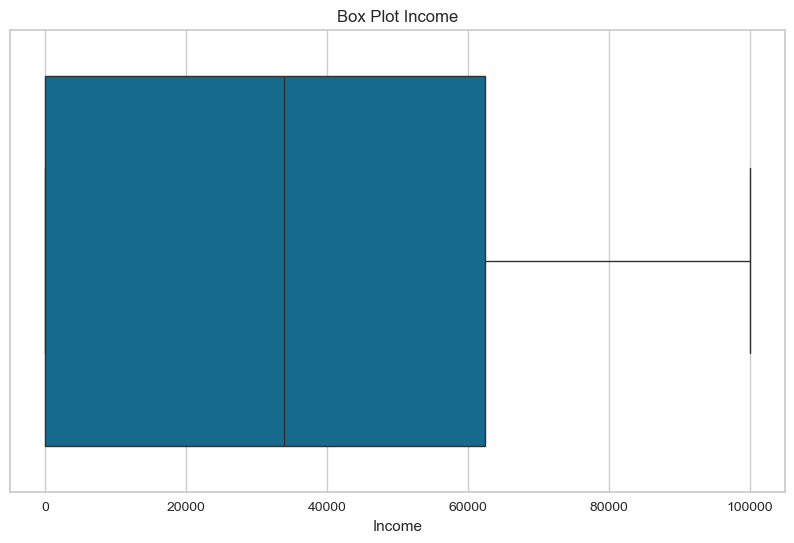

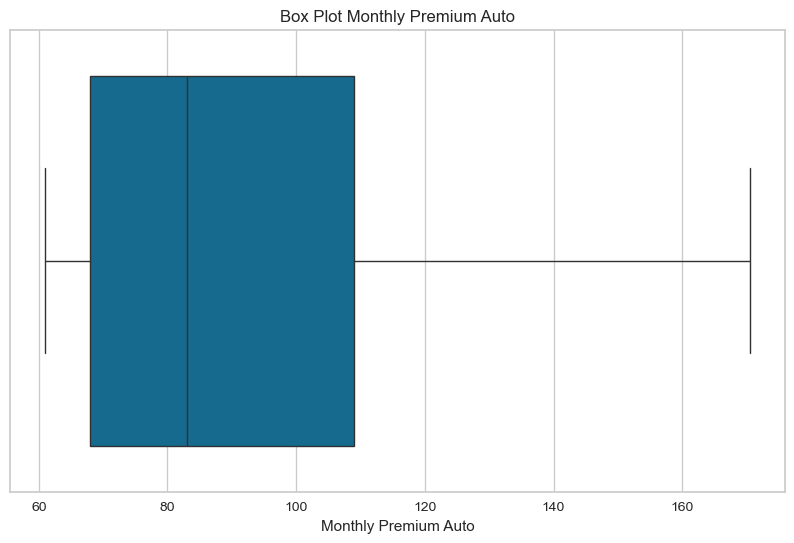

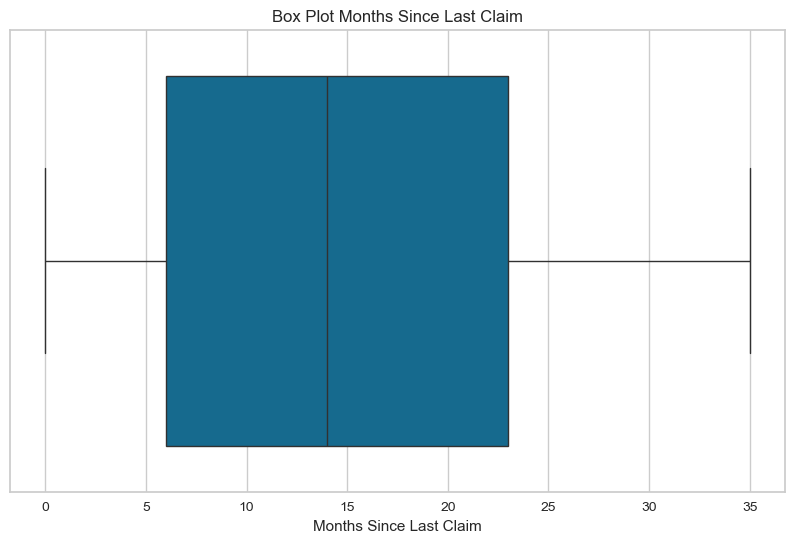

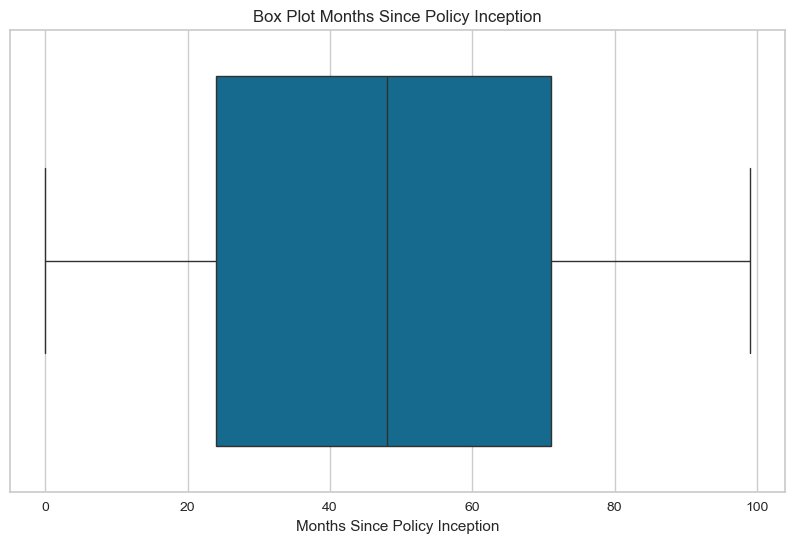

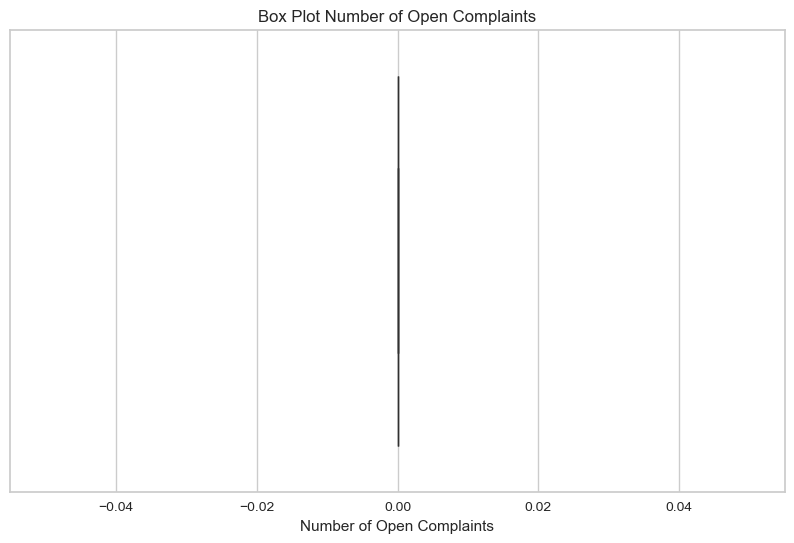

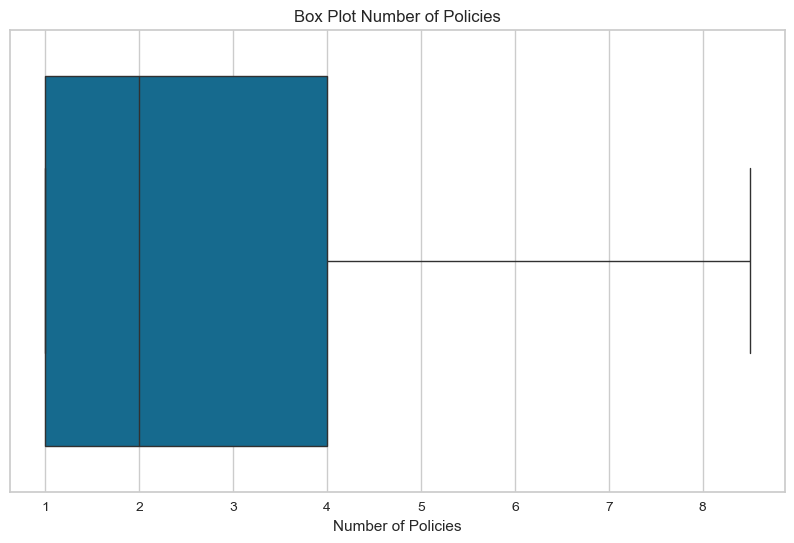

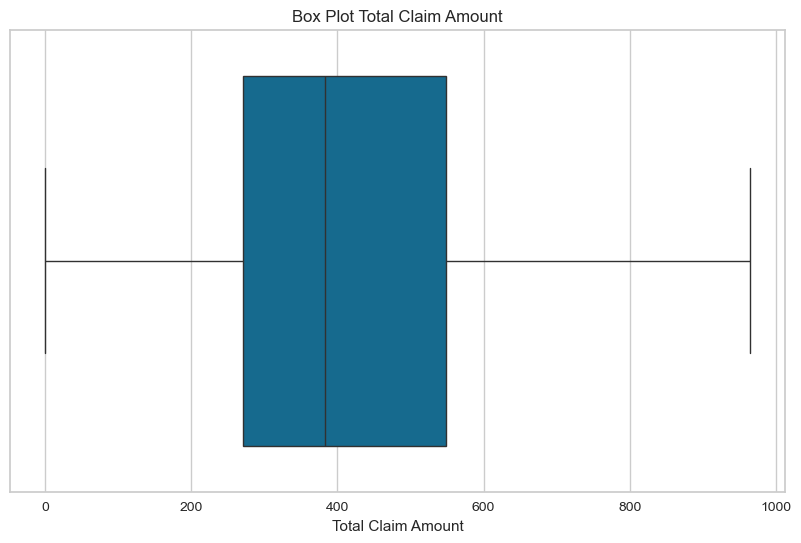

In [20]:
# mengecek outlier setelah dihapus dengan box plot
num_data = df.select_dtypes(exclude=['object'])
num_cols = num_data.columns

for feature in num_data:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=num_data[feature])
    plt.title(f'Box Plot {feature}')
    plt.show

**Penjelasan**

Berdasarkan analisis melalui visualisasi box plot dan nilai IQR didapatkan terdapat outlier pada fitur `Customer Lifetime Value`, `Monthly Premium Auto`, dan `Number of Policies` yang harus ditangani karena dapat mempengaruhi hasil clustering.

## Encoding Data Kategorikal

In [21]:
# membuat salinan data untuk encoding
df_encoded = df.copy()

In [22]:
# melakukan encoding terhadap data kategorik
label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [23]:
# mengecek informasi dataset setelah encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8971 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          8971 non-null   int32  
 1   Customer Lifetime Value        8971 non-null   float64
 2   Response                       8971 non-null   int32  
 3   Coverage                       8971 non-null   int32  
 4   Education                      8971 non-null   int32  
 5   EmploymentStatus               8971 non-null   int32  
 6   Gender                         8971 non-null   int32  
 7   Income                         8971 non-null   float64
 8   Location Code                  8971 non-null   int32  
 9   Marital Status                 8971 non-null   int32  
 10  Monthly Premium Auto           8971 non-null   float64
 11  Months Since Last Claim        8971 non-null   float64
 12  Months Since Policy Inception  8971 non-null   float6

In [24]:
# mengecek dataset terbaru setelah encoding
df_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274.0,1,1,...,5.0,0,1.0,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0.0,1,2,...,42.0,0,8.0,1,5,2,0,964.262851,0,1
2,2,12887.431650,0,2,0,1,0,48767.0,1,1,...,38.0,0,2.0,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0.0,1,1,...,65.0,0,7.0,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836.0,0,2,...,44.0,0,1.0,1,3,0,0,138.130879,0,1


##### **Penjelasan**

Sebelum melakukan menggunakan algoritma clustering data kategorikal harus diubah menjadi data numerik supaya dapat diproses dengan benar oleh model.

## Normalisasi dan Standarisasi

In [25]:
# membuat salinan data untuk normalisasi
df_normalized = df_encoded.copy()

In [26]:
# melakukan normalisasi terhadap data numerik
numeric_features = df_normalized.select_dtypes(exclude=['object']).columns

scaler_minmax = MinMaxScaler()

df_normalized[numeric_features] = scaler_minmax.fit_transform(df_normalized[numeric_features])
df_normalized.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1.00,0.059734,0.0,0.0,0.0,0.25,0.0,0.562847,0.5,0.5,...,0.050505,0.0,0.000000,0.0,0.250,0.000000,0.000000,0.399011,1.0,0.5
1,0.00,0.350708,0.0,0.5,0.0,1.00,0.0,0.000000,0.5,1.0,...,0.424242,0.0,0.933333,0.5,0.625,0.666667,0.000000,1.000000,0.0,0.5
2,0.50,0.758449,0.0,1.0,0.0,0.25,0.0,0.487763,0.5,0.5,...,0.383838,0.0,0.133333,0.5,0.625,0.000000,0.000000,0.587424,1.0,0.5
3,0.25,0.396695,0.0,0.0,0.0,1.00,1.0,0.000000,0.5,0.5,...,0.656566,0.0,0.800000,0.0,0.125,0.000000,0.666667,0.549473,0.6,0.5
4,1.00,0.063197,0.0,0.0,0.0,0.25,1.0,0.438443,0.0,1.0,...,0.444444,0.0,0.000000,0.5,0.375,0.000000,0.000000,0.143162,0.0,0.5


##### **Penjelasan**

Pada fitur-fitur numerik pada dataset yang ada terdapat perbedaan skala ukuran yang dapat menyebabkan clustering berbasis jarak menjadi bias terhadap fitur dengan skala lebih besar sehingga perlu dilakukan normalisasi guna memberikan bobot yang seimbang pada semua fitur.

# **6. Pembangunan Model Clustering**

## **a. K-Means**

Pada tahap ini, malakukan permodelan clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [27]:
# menginisiasi model K-Means
model = KMeans(random_state=42)

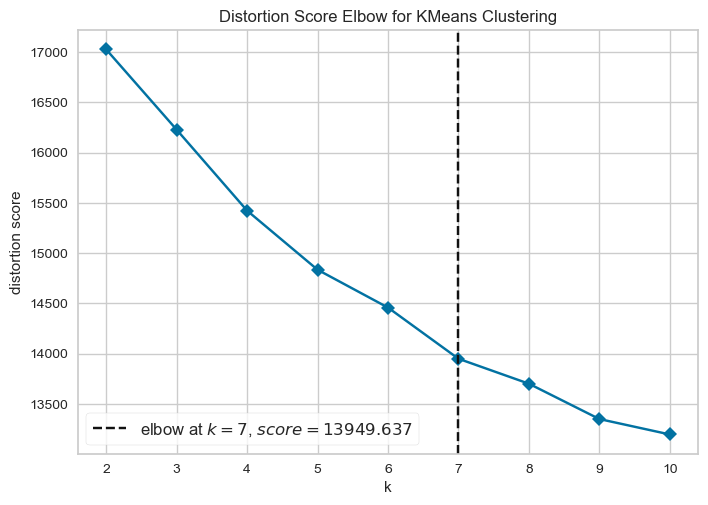

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# mengecek K optimal dengan elbow method
visualizer = KElbowVisualizer(model, k=(2, 11), timings=False)
visualizer.fit(df_normalized)
visualizer.show()

##### **Penjelasan**

Dalam permodelan clustering dengan **K-Means**, diperlukan penentuan jumlah klaster yang optimal. Dalam menentukan jumlah kluster (K) metode yang dapat digunakan adalah menggunakan **elbow method** dan meninjau **silhouette score** dari pengujian beberapa kluster terhadap dataset. Pada implementasi terhadap dataset ini menghasilkan elbow method dengan nilai K optimal 7 akan tetapi pada pengujian beberapa silhouette score didapatkan model optimal dengan K = 2. Dengan meninjau silhouette score, diambil keputusan kluster terbaik untuk dataset ini adalah 2 kluster. Dari permodelan K-Means dengan jumlah kluster 2, didapatkan silhouette score sebesar 0.116 yang menunjukkan hasil clustering kurang baik sehingga perlu ada penanganan melalui feature selection guna mencapai silhouette score yang diinginkan (>0.7) sehingga hasil clustering menjadi sangat baik atau pemisahan antar cluster sangat jelas.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [29]:
# melakukan permodelan K-Means
kmeans_norm = KMeans(n_clusters=7, random_state=42, n_init=10)
labels_norm = kmeans_norm.fit_predict(df_normalized)

# melakukan evaluasi model dengan silhoette score
score_norm = silhouette_score(df_normalized, labels_norm)
print(f'[K-Means] Silhouette Score: {score_norm:.3f}')

[K-Means] Silhouette Score: 0.094


In [30]:
# mencari silhouette_score
best_silhouette = 0
best_k = 0

for k in range(2, 8):
    model_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_kmeans = model_kmeans.fit_predict(df_normalized)

    score = silhouette_score(df_normalized, labels_kmeans)
    print(f'K = {k} - Silhouette Score: {score:.4f}')

    if score > best_silhouette:
            best_silhouette = score
            best_k = k

print(f"[Optimal]K = {best_k} - Silhouette Score: {best_silhouette:.4f}")

K = 2 - Silhouette Score: 0.1162
K = 3 - Silhouette Score: 0.1046
K = 4 - Silhouette Score: 0.0977
K = 5 - Silhouette Score: 0.0959
K = 6 - Silhouette Score: 0.0964
K = 7 - Silhouette Score: 0.0939
[Optimal]K = 2 - Silhouette Score: 0.1162


In [31]:
model_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = model_kmeans.fit_predict(df_normalized)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### SelectKBest

In [32]:
k_features = 7

selector = SelectKBest(score_func=f_classif, k=k_features)
df_selected = selector.fit_transform(df_normalized, labels_kmeans)

# Menampilkan fitur yang terpilih
selected_features = df_normalized.columns[selector.get_support()]
print("Fitur Terpilih:", selected_features)

Fitur Terpilih: Index(['EmploymentStatus', 'Gender', 'Marital Status',
       'Months Since Last Claim', 'Renew Offer Type', 'Total Claim Amount',
       'Vehicle Class'],
      dtype='object')


c:\Users\M Ilham Ramadhan\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 6 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\M Ilham Ramadhan\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\M Ilham Ramadhan\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [33]:
df_selected = df_normalized[selected_features]
df_selected.head()

,EmploymentStatus,Gender,Marital Status,Months Since Last Claim,Renew Offer Type,Total Claim Amount,Vehicle Class
0,0.25,0.0,0.5,0.914286,0.000000,0.399011,1.0
1,1.00,0.0,1.0,0.371429,0.666667,1.000000,0.0
2,0.25,0.0,0.5,0.514286,0.000000,0.587424,1.0
3,1.00,1.0,0.5,0.514286,0.000000,0.549473,0.6
4,0.25,1.0,1.0,0.342857,0.000000,0.143162,0.0


##### **Penjelasan**

Dilakukan **feature selection** dengan **SelectKBest** karena metode ini memilih fitur berdasarkan hubungan statistik antara setiap fitur dengan label hasil clustering awal yang menunjukkan seberapa berkontribusi fitur terhadap label. Tujuan dari feature selection ini adalah untuk mengidentifikasi fitur yang paling berkontribusi dalam membentuk pola kelompok pelanggan untuk meningkatkan kualitas pemodelan dan interpretasi hasil clustering. Dari hasil feature selection, fitur yang berkontribusi adalah `EmploymentStatus`, `Gender`, `Marital Status`, `Months Since Last Claim`, `Renew Offer Type`, `Total Claim Amount`, `Vehicle Class`

**Penjelasan**

Pada fitur-fitur numerik pada dataset yang ada terdapat perbedaan skala ukuran yang dapat menyebabkan clustering berbasis jarak menjadi bias terhadap fitur dengan skala lebih besar sehingga perlu dilakukan normalisasi guna memberikan bobot yang seimbang pada semua fitur.

### K-Means

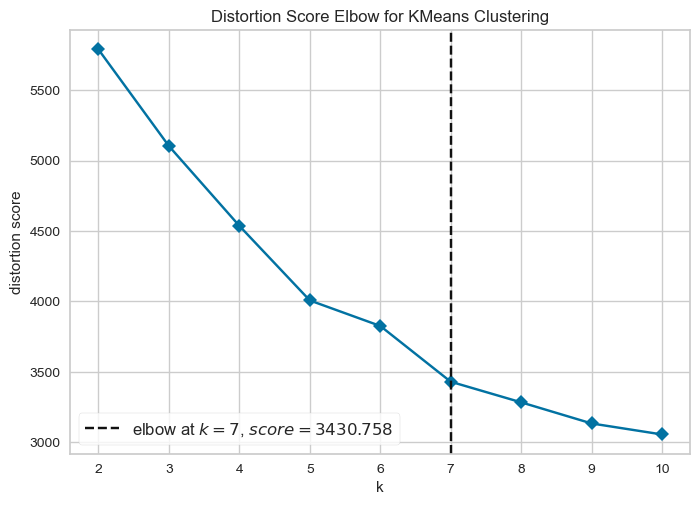

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# mengecek K optimal dengan elbow method
visualizer = KElbowVisualizer(model, k=(2, 11), timings=False)
visualizer.fit(df_selected)
visualizer.show()

In [35]:
# melakukan permodelan K-Means
kmeans_norm = KMeans(n_clusters=7, random_state=42, n_init=10)
labels_norm = kmeans_norm.fit_predict(df_selected)

# melakukan evaluasi model dengan silhoette score
score_norm = silhouette_score(df_selected, labels_norm)
print(f'[K-Means Selected] Silhouette Score: {score_norm:.3f}')

[K-Means Selected] Silhouette Score: 0.241


In [36]:
# mencari silhouette_score
best_silhouette = 0
best_k = 0

for k in range(2, 9):
    model_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_kmeans = model_kmeans.fit_predict(df_selected)

    score = silhouette_score(df_selected, labels_kmeans)
    print(f'K = {k} - Silhouette Score: {score:.4f}')

    if score > best_silhouette:
            best_silhouette = score
            best_k = k

print(f"[Optimal]K = {best_k} - Silhouette Score: {best_silhouette:.4f}")

K = 2 - Silhouette Score: 0.2749
K = 3 - Silhouette Score: 0.2292
K = 4 - Silhouette Score: 0.2421
K = 5 - Silhouette Score: 0.2490
K = 6 - Silhouette Score: 0.2557
K = 7 - Silhouette Score: 0.2410
K = 8 - Silhouette Score: 0.2392
[Optimal]K = 2 - Silhouette Score: 0.2749


##### **Penjelasan**

Dari penentuan jumlah kluster (K) dengan **elbow method** didapatkan nilai K optimal adalah 7 akan tetapi pada pengujian beberapa silhouette score didapatkan model optimal dengan K = 2. Dengan meninjau silhouette score, diambil keputusan kluster terbaik untuk dataset ini adalah 2 kluster. Dari permodelan K-Means dengan jumlah kluster 2, didapatkan silhouette score sebesar 0.2749 yang menunjukkan hasil clustering dengan fitur optimal masih kurang baik akan tetapi telah mengalami peningkatan daripada model awal. Untuk meningkatkan hasil clustering dilakukan reduksi dimensi dengan PCA

### PCA

In [37]:
# hasil clustering K-Means tanpa PCA
k_baseline = 2
model_kmeans_baseline = KMeans(n_clusters=k_baseline, random_state=42, n_init=10)
labels_baseline = model_kmeans_baseline.fit_predict(df_selected)
silhouette_baseline = silhouette_score(df_selected, labels_baseline)

# mencari silhouette_score terbaik dengan PCA
best_silhouette = 0
best_n = 0
best_k = 0

for n in range(2, 4):
    pca = PCA(n_components=n)
    df_pca = pca.fit_transform(df_selected)

    for k in range(2, 6):
        model_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels_pca = model_kmeans.fit_predict(df_pca)

        silhouette_pca = silhouette_score(df_pca, labels_pca)

        print(f'PCA = {n}, K = {k} - Silhouette Score: {silhouette_pca:.4f}')

        if silhouette_pca > best_silhouette:
            best_silhouette = silhouette_pca
            best_n = n
            best_k = k

print(f"[Baseline] K = {k_baseline} - Silhouette Score: {silhouette_baseline:.4f}")
print(f"[Optimal] PCA = {best_n}, K = {best_k} - Silhouette Score: {best_silhouette:.4f}")

PCA = 2, K = 2 - Silhouette Score: 0.5851
PCA = 2, K = 3 - Silhouette Score: 0.6267
PCA = 2, K = 4 - Silhouette Score: 0.7190
PCA = 2, K = 5 - Silhouette Score: 0.6787
PCA = 3, K = 2 - Silhouette Score: 0.4365
PCA = 3, K = 3 - Silhouette Score: 0.4302
PCA = 3, K = 4 - Silhouette Score: 0.4814
PCA = 3, K = 5 - Silhouette Score: 0.5113
[Baseline] K = 2 - Silhouette Score: 0.2749
[Optimal] PCA = 2, K = 4 - Silhouette Score: 0.7190


In [38]:
# menginisialisasi PCA
pca = PCA(n_components=best_n)
df_pca = pca.fit_transform(df_selected)

In [39]:
# membuat permodelan K-Means dengan PCA
labels_optimal= KMeans(n_clusters=best_k, random_state=42, n_init=10).fit_predict(df_pca)
kmeans_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_model.fit(df_pca)
centroids = kmeans_model.cluster_centers_

##### **Penjelasan**

Dengan menggunakan fitur yang telah diseleksi menggunakan SelectKBest dan reduksi dengan PCA didapatkan peningkatan silhouette score yang signifikan daripada model tanpa PCA. Dengan dimensi PCA sebanyak 2 dan banyaknya kluster 4 didapatkan silhouette score sebesar 0.7190 yang menandakan clustering sudah sangat baik. Hal ini menunjukkan bahwa reduksi dimensi menggunakan PCA dapat meningkatkan kualitas clustering

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi. Dengan menggunakan permodelan optimal akan dimunculkan grafik scatter plot atau 2D PCA projection dan distribusi cluster pada dataset untuk mengetahui penyebaran data dengan label serta distribusi dari cluster.

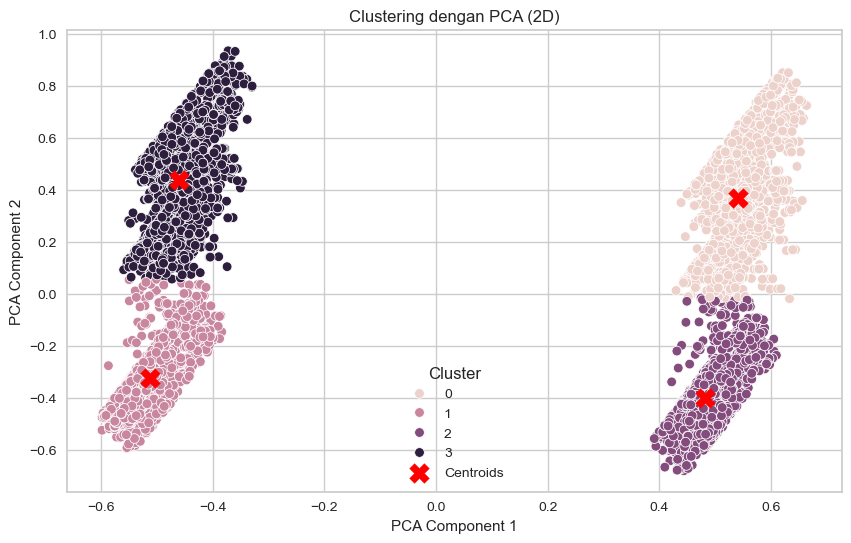

In [40]:
# membuat visualisasi clustering hasil permodelan
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_optimal)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f"Clustering dengan PCA (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [41]:
# mengecek distribusi per cluster
df_cluster = pd.DataFrame(df_pca, columns=[f'PCA_{i+1}' for i in range(best_n)])
df_cluster['cluster'] = labels_optimal
cluster_counts = df_cluster['cluster'].value_counts()

print("\nJumlah data per cluster:")
print(cluster_counts)


Jumlah data per cluster:
cluster
1    2460
2    2274
3    2119
0    2118
Name: count, dtype: int64


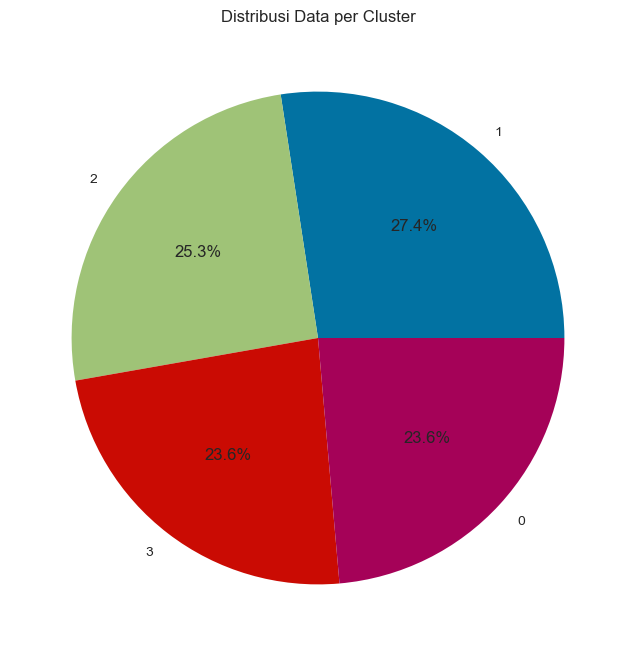

In [42]:
# membuat visualisasi pie chart persentase tiap cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Data per Cluster')

plt.show()

**Penjelasan**

Hasil clustering dengan K = 4 dan reduksi dimensi menggunakan PCA = 2 menunjukkan distribusi data yang seimbang antar cluster. Cluster 2 memiliki jumlah anggota terbanyak (27.8%), diikuti oleh Cluster 1 (25.2%), Cluster 0 (23.8%), dan Cluster 3 (23.2%). Berdasarkan visualisasi dengan PCA 2D terlihat pemisahan yang cukup jelas antar cluster dengan centroid di pusat masing-masing cluster. Dari Silhouette Score sebesar 0.7562, hasil clustering ini menunjukkan kualitas pemisahan yang sangat baik. Nilai ini menunjukkan bahwa rata-rata jarak antar data dalam satu cluster lebih kecil dibanding jaraknya ke cluster lain, sehingga menunjukkan struktur cluster yang cukup jelas dan tidak ada tumpang tindih yang signifikan.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [43]:
# menambahkan cluster ke data hasil encoding dan normalisasi
df_normalized['Cluster'] = labels_optimal
df_normalized.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Cluster
0,1.00,0.059734,0.0,0.0,0.0,0.25,0.0,0.562847,0.5,0.5,...,0.0,0.000000,0.0,0.250,0.000000,0.000000,0.399011,1.0,0.5,3
1,0.00,0.350708,0.0,0.5,0.0,1.00,0.0,0.000000,0.5,1.0,...,0.0,0.933333,0.5,0.625,0.666667,0.000000,1.000000,0.0,0.5,1
2,0.50,0.758449,0.0,1.0,0.0,0.25,0.0,0.487763,0.5,0.5,...,0.0,0.133333,0.5,0.625,0.000000,0.000000,0.587424,1.0,0.5,3
3,0.25,0.396695,0.0,0.0,0.0,1.00,1.0,0.000000,0.5,0.5,...,0.0,0.800000,0.0,0.125,0.000000,0.666667,0.549473,0.6,0.5,0
4,1.00,0.063197,0.0,0.0,0.0,0.25,1.0,0.438443,0.0,1.0,...,0.0,0.000000,0.5,0.375,0.000000,0.000000,0.143162,0.0,0.5,2


In [44]:
# melakukan inverse transform data numerik hasil normalisasi
df_normalized[numeric_features] = scaler_minmax.inverse_transform(df_normalized[numeric_features])
df_normalized

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Cluster
0,4.0,2763.519279,0.0,0.0,0.0,1.0,0.0,56274.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,384.811147,5.0,1.0,3
1,0.0,6979.535903,0.0,1.0,0.0,4.0,0.0,0.0,1.0,2.0,...,0.0,8.0,1.0,5.0,2.0,0.0,964.262851,0.0,1.0,1
2,2.0,12887.431650,0.0,2.0,0.0,1.0,0.0,48767.0,1.0,1.0,...,0.0,2.0,1.0,5.0,0.0,0.0,566.472247,5.0,1.0,3
3,1.0,7645.861827,0.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0,...,0.0,7.0,0.0,1.0,0.0,2.0,529.881344,3.0,1.0,0
4,4.0,2813.692575,0.0,0.0,0.0,1.0,1.0,43836.0,0.0,2.0,...,0.0,1.0,1.0,3.0,0.0,0.0,138.130879,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,1.0,4100.398533,0.0,2.0,1.0,1.0,0.0,47761.0,1.0,2.0,...,0.0,1.0,1.0,4.0,0.0,1.0,541.282007,0.0,0.0,1
9129,1.0,16387.346224,0.0,0.0,0.0,1.0,1.0,71941.0,2.0,1.0,...,0.0,2.0,1.0,3.0,1.0,3.0,198.234764,0.0,1.0,2
9131,1.0,8163.890428,0.0,1.0,0.0,4.0,1.0,0.0,1.0,2.0,...,0.0,2.0,0.0,1.0,0.0,1.0,790.784983,0.0,1.0,2
9132,1.0,7524.442436,0.0,1.0,1.0,1.0,1.0,21941.0,1.0,1.0,...,0.0,3.0,1.0,4.0,2.0,1.0,691.200000,0.0,0.0,2


In [45]:
# melakukan inverse transform data kategorik hasil encoding
for col, le in label_encoders.items():
    df_normalized[col] = le.inverse_transform(df_normalized[col].astype(int))

In [46]:
# mengecek informasi dataset
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8971 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          8971 non-null   object 
 1   Customer Lifetime Value        8971 non-null   float64
 2   Response                       8971 non-null   object 
 3   Coverage                       8971 non-null   object 
 4   Education                      8971 non-null   object 
 5   EmploymentStatus               8971 non-null   object 
 6   Gender                         8971 non-null   object 
 7   Income                         8971 non-null   float64
 8   Location Code                  8971 non-null   object 
 9   Marital Status                 8971 non-null   object 
 10  Monthly Premium Auto           8971 non-null   float64
 11  Months Since Last Claim        8971 non-null   float64
 12  Months Since Policy Inception  8971 non-null   float6

In [47]:
# mengecek dataset
df_normalized

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Cluster
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,...,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,3
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0.0,Suburban,Single,...,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,964.262851,Four-Door Car,Medsize,1
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,...,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,3
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0.0,Suburban,Married,...,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836.0,Rural,Single,...,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,Premium,College,Employed,F,47761.0,Suburban,Single,...,0.0,1.0,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large,1
9129,California,16387.346224,No,Basic,Bachelor,Employed,M,71941.0,Urban,Married,...,0.0,2.0,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0.0,Suburban,Single,...,0.0,2.0,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,California,7524.442436,No,Extended,College,Employed,M,21941.0,Suburban,Married,...,0.0,3.0,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


### Interpretasi Target

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [51]:
# melihat summary data numerik
summary = df_normalized.select_dtypes(include=[np.number]).groupby('Cluster').agg(['mean', 'median', 'std'])
pd.set_option('display.max_columns', None)
summary

Customer Lifetime Value                                  Income  \
                           mean       median          std          mean   
Cluster                                                                   
0                   7881.789282  7042.073709  4314.408528  35882.496695   
1                   6521.850342  5410.954806  4032.565053  38211.432520   
2                   6438.974456  5416.518019  3922.425886  38433.674142   
3                   8056.613808  7374.077921  4388.107406  37901.994337   

                               Monthly Premium Auto                    \
          median           std                 mean median        std   
Cluster                                                                 
0        31063.0  31096.498983           102.856704  104.0  29.968416   
1        34990.0  30461.595353            80.689634   73.0  22.269827   
2        35831.0  29946.338023            81.305849   73.0  23.213688   
3        33746.0  30193.535628           103.568193  106.0  29.138199   

        Months Since Last Claim                    \
                           mean median        std   
Cluster                                             
0                     15.533994   14.0  10.439086   
1                     15.005691   15.0   9.868924   
2                     15.213281   14.0   9.935417   
3                     14.650779   13.0  10.087941   

        Months Since Policy Inception                    \
                                 mean median        std   
Cluster                                                   
0                           48.264873   49.0  27.437604   
1                           48.101626   47.0  27.906838   
2                           48.180299   47.0  28.240779   
3                           47.653138   47.0  28.067335   

        Number of Open Complaints             Number of Policies         \
                             mean median  std               mean median   
Cluster                                                                   
0                             0.0    0.0  0.0           2.981350    2.0   
1                             0.0    0.0  0.0           2.961585    2.0   
2                             0.0    0.0  0.0           2.983509    2.0   
3                             0.0    0.0  0.0           2.858660    2.0   

                  Total Claim Amount                          
              std               mean      median         std  
Cluster                                                       
0        2.373986         501.358575  494.400000  258.064906  
1        2.347904         351.718252  336.000000  206.848012  
2        2.353787         377.363702  345.600000  213.415245  
3        2.262247         456.279432  456.702735  256.007474

C:\Users\M Ilham Ramadhan\AppData\Local\Temp\ipykernel_30824\3369867731.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=8)
C:\Users\M Ilham Ramadhan\AppData\Local\Temp\ipykernel_30824\3369867731.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=8)
C:\Users\M Ilham Ramadhan\AppData\Local\Temp\ipykernel_30824\3369867731.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=8)
C:\Users\M Ilham Ramadhan\AppData\Local\Temp\ipykernel_30824\3369867731.py:12: UserWarning: set_ticklabels() should only be used with a fix

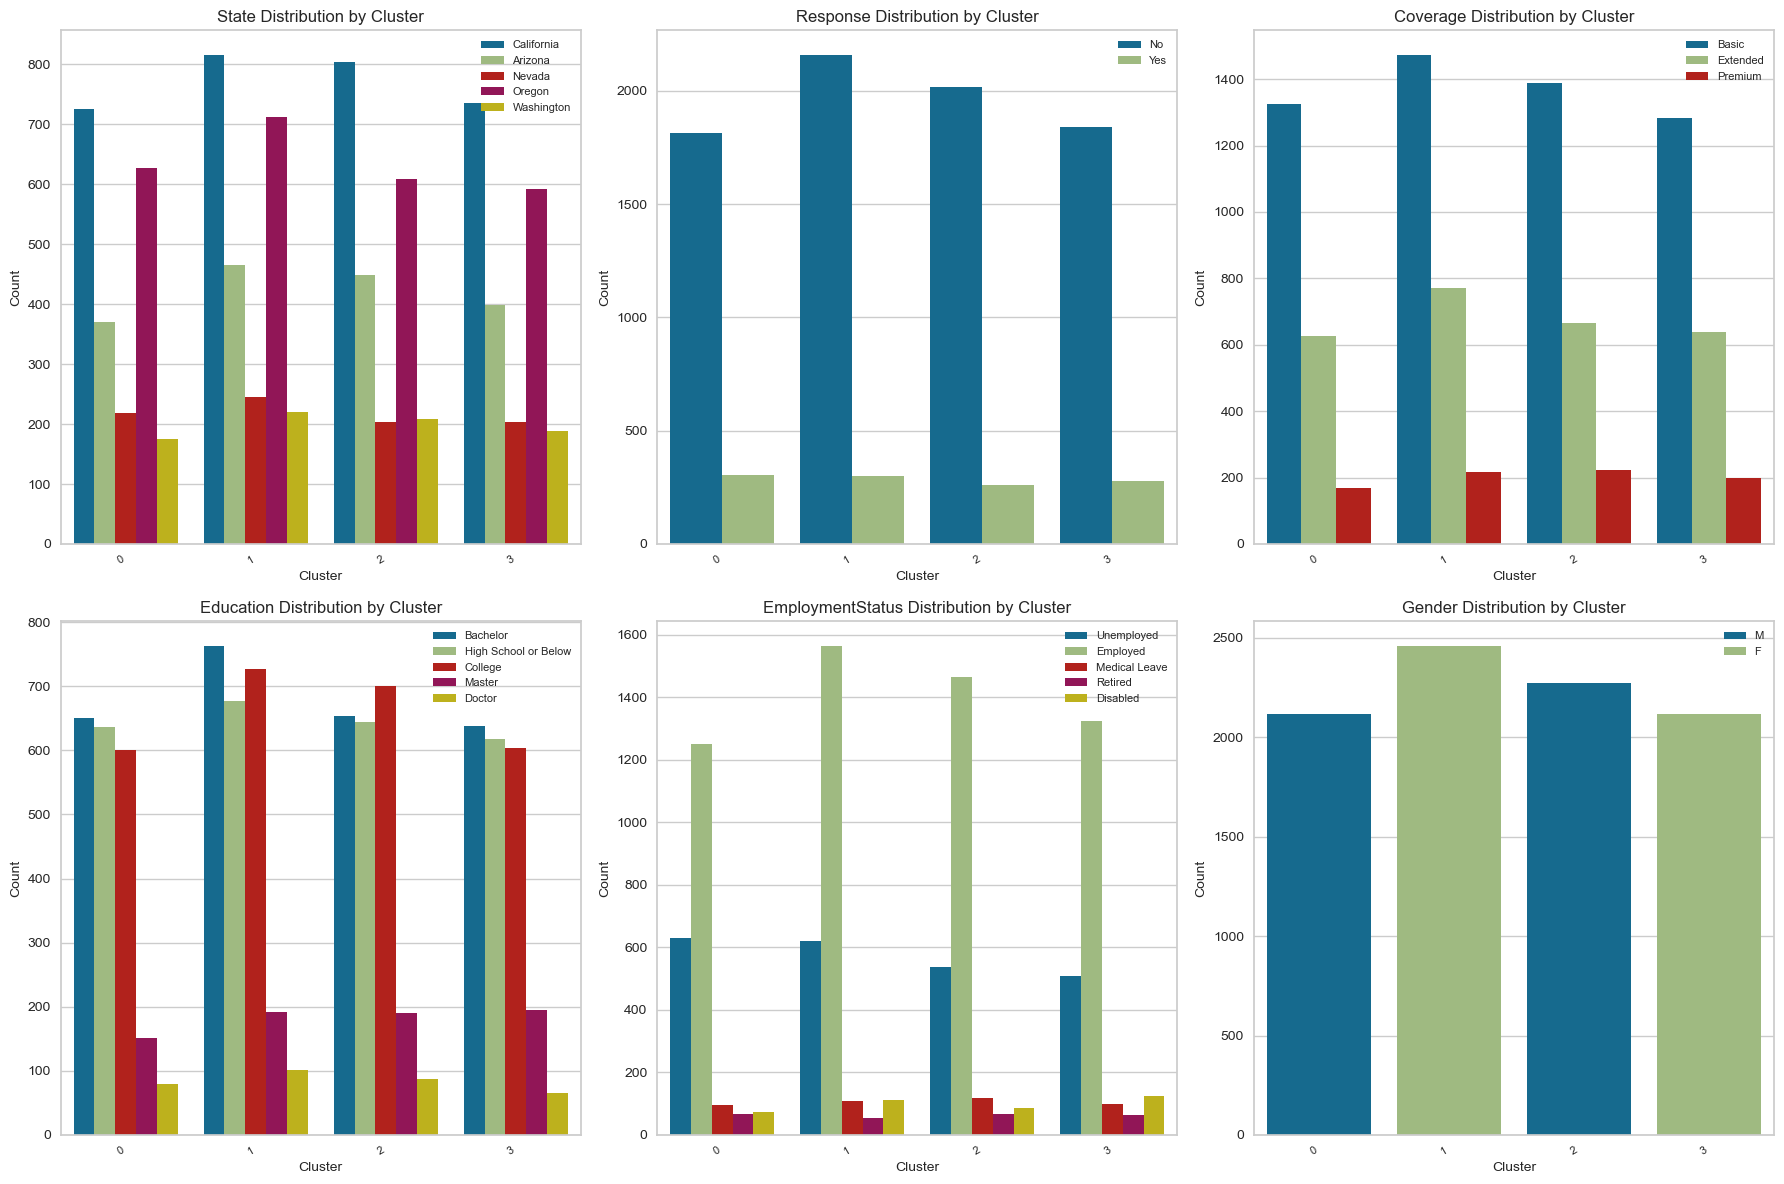

In [49]:
# mengambil data kategorik
categorical_cols =  df_normalized.select_dtypes(exclude=[np.number])

# membuat plot dari data kategorik berdasarkan cluster
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for col, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(data=df_normalized, x="Cluster", hue=col, ax=ax)
    ax.set_title(f"{col} Distribution by Cluster", fontsize=12)
    ax.set_xlabel("Cluster", fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=8)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

### **Cluster 0 - Loyalis Berisiko, Finansial Terbatas**  
Klaster ini memiliki pelanggan dengan `Customer Lifetime Value (CLV)` rata-rata **7881.79**, yang merupakan tertinggi kedua setelah klaster 3. Pelanggan pada cluster ini membayar premi bulanan cukup tinggi yaitu **102.86** dengan `Total Claim Amount` tertinggi di antara seluruh klaster yakni sebesar **501.36**. Rata-rata jumlah polis yang dimiliki pelanggan adalah **2.98** dengan durasi sejak klaim terakhir **15.53 bulan** dan masa menjadi pelanggan sekitar **48.26 bulan**. Penghasilan rata-rata pelanggan di klaster ini adalah **35,882.50**, yang merupakan paling rendah dibandingkan dengan klaster lainnya.

Mayoritas pelanggan di kluster ini berasal dari **California dan Nevada**, dengan tingkat pendidikan pelanggan dominan pada **High School dan College**. Status pekerjaan terbanyak dari pelanggan di cluster ini adalah **Employed**, namun terdapat proporsi cukup besar yang **Unemployed**. Pelanggan di klaster ini cenderung memilih asuransi dengan tingkatan **Basic Coverage**, dan memiliki tingkat respons terhadap penawaran baru yang rendah.

Pelanggan pada cluster ini tergolong setia namun berisiko tinggi karena memiliki klaim besar meskipun kemampuan finansial yang terbatas. Untuk mengelola pelanggan pada cluster ini, perusahaan sebaiknya menawarkan program edukasi finansial, peningkatan perlindungan secara bertahap, serta insentif berbasis perilaku klaim yang bertanggung jawab untuk menjaga profitabilitas jangka panjang.

### **Cluster 1 - Profesional Potensial, Risiko Rendah**  
Pelanggan di klaster ini memiliki penghasilan rata-rata tertinggi, yakni **38,211.43**, meskipun `Customer Lifetime Value (CLV)` mereka tergolong rendah hanya **6521.85**. Total klaim yang dilakukan juga tergolong rendah yaitu **351.72** dan premi yang dibayarkan adalah yang terendah dari semua klaster yakni sebesar **80.69**. Pelanggan pada kluster ini memiliki rata-rata **2.96 polis**, masa sejak klaim terakhir sekitar **15.01 bulan**, dan sudah menjadi pelanggan selama **48.10 bulan**.

Mayoritas pelanggan pada klaster ini berstatus **Employed** dengan tingkat respons tertinggi terhadap penawaran baru. Sebagian besar pealnggan berasal dari **California** dan tingkat pendidikan yang diampuh pelanggan relatif tinggi, didominasi oleh lulusan **Bachelor dan College**. Perlindungan yang dipilih lebih bervariasi, dengan dominasi **Basic Coverage** diikuti oleh **Extended dan Premium**.

Pelanggan pada cluster ini tergolong potensial dengan risiko rendah karena memiliki jumlah klaim terendah dan premi yang juga lebih rendah dibanding klaster lain. Untuk mengelola pelanggan pada cluster ini, perusahaan dapat menawarkan produk tambahan dengan nilai lebih, seperti loyalty program atau diskon untuk bundling polis, guna meningkatkan keterikatan dan memperluas cakupan perlindungan tanpa meningkatkan risiko signifikan.

### **Cluster 2 - Stabil & Menguntungkan, Risiko Sangat Rendah**  
Klaster ini memiliki `Total Claim Amount` dan `Customer Lifetime Value (CLV)` terendah daripada klaster lainnya, yaitu **345.60** dan **6438.97**. Penghasilan rata-rata pelanggan di klaster ini adalah **38,433.67** juga adalah yang tertinggi dibandingkan klaster lainnya. Premi bulanan yang dibayarkan pun rendah yaitu sebesar **81.31** dengan jumlah polis rata-rata **2.98**. Pelanggan di klaster ini telah menjadi pelanggan selama **48.18 bulan** dengan waktu sejak klaim terakhir adalah **15.21 bulan**.

Pelanggan di klaster ini sebagian besar berstatus **Employed** dan mayoritas pelanggan berasal dari **California dan Nevada**. Pelanggan memiliki latar belakang pendidikan mayoritas **High School dan College**. Mereka mayoritas memilih  jenis asuransi **Basic Coverage**, namun juga terdapat proporsi signifikan pada jenis asuransi **Extended dan Premium** yang lebih tinggi dari klaster lainnya.

Pelanggan pada cluster ini termasuk stabil secara finansial dan memiliki perilaku klaim yang sangat sehat, dengan nilai klaim rata-rata paling rendah di antara semua klaster. Untuk mengelola pelanggan pada cluster ini, perusahaan sebaiknya fokus pada retensi melalui personalisasi penawaran dan memperkenalkan upgrade coverage yang sesuai profil mereka, karena mereka merupakan segmen paling menguntungkan dengan risiko sangat rendah.

### **Cluster 3 - High Value, Risiko Finansial Tinggi**  
Pelanggan pada klaster ini memiliki `Customer Lifetime Value (CLV)` tertinggi, yaitu **8056.61** dan `Total Claim Amount` kedua tertinggi sebesar **456.28**. Penghasilan pelanggan justru yang paling rendah yaitu hanya sebesar **37,091.49**, namun mereka membayar premi bulanan tertinggi yaitu **103.57**. Rata-rata jumlah polis dari pelanggan adalah yang terendah dari seluruh klaster yakni hanya **2.86** dan mereka memiliki waktu sejak klaim terakhir sekitar **14.65 bulan**.

Klaster ini memiliki proporsi lebih besar pelanggan dengan status **Unemployed dan Medical Leave** yang menunjukkan risiko finansial. Tingkat pendidikan pelanggan pada klaster ini cenderung menengah dengan dominasi lulusan **High School dan College**. 

Pelanggan pada cluster ini tergolong berisiko tinggi meskipun memiliki CLV tinggi karena memiliki klaim yang besar dan kondisi finansial yang kurang stabil. Untuk mengelola pelanggan pada cluster ini, perusahaan perlu menerapkan seleksi risiko yang lebih ketat, menawarkan edukasi terkait penggunaan polis secara bijak, serta membatasi akses ke produk dengan risiko tinggi sambil tetap menjaga hubungan melalui layanan pelanggan yang suportif.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [50]:
df_normalized.to_csv('AutoInsurance_Clustering.csv', index=False)